In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix


In [139]:
df=pd.read_csv(r'/content/sample_data/mushrooms.csv')
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1266,e,f,f,g,f,n,f,w,b,p,...,s,w,w,p,w,o,e,k,a,g
752,e,f,s,w,t,a,f,w,n,n,...,s,w,w,p,w,o,p,u,v,d
2177,e,x,y,e,t,n,f,c,b,p,...,s,w,w,p,w,o,p,n,v,d
3701,p,x,y,g,f,f,f,c,b,p,...,k,b,b,p,w,o,l,h,y,g
54,p,x,s,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,v,u


# Preprocessing


In [140]:
mappings = list()

encoder = LabelEncoder()

for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [141]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


FROM EDA we get to know that Veil-type has only one value so we dropped that columns .

In [142]:
df.drop(columns=['veil-type'],inplace=True)

In [143]:
df.sample()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2530,0,5,3,3,1,5,1,0,0,5,...,2,2,7,6,2,1,4,3,4,0


In [144]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [145]:
X=df.drop('class',axis=1)
Y=df['class']

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Standardization

In [148]:
scaler=StandardScaler()

In [149]:
X_train=scaler.fit_transform(X_train)

In [150]:
X_test=scaler.fit_transform(X_test)

# Model Creation

#
LogisticRegression

In [151]:
logi=LogisticRegression()

In [152]:
logi.fit(X_train,y_train)

LogisticRegression()

In [153]:
logi.score(X_train,y_train)

0.9572241883366672

In [154]:
logi.score(X_test,y_test)

0.9556923076923077

In [155]:
logi_pred=logi.predict(X_test)

In [156]:
confusion_matrix(logi_pred,y_test)

array([[795,  24],
       [ 48, 758]])

# DesicionTree Classifier

In [157]:
clf=DecisionTreeClassifier()

In [158]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

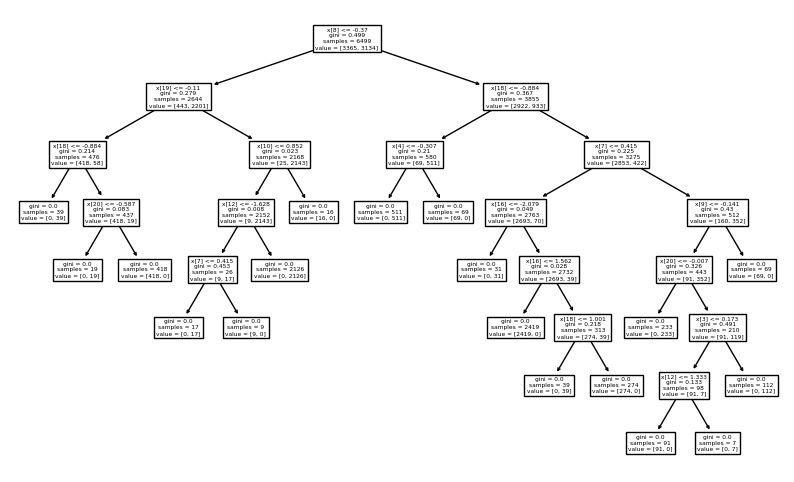

In [159]:
plt.figure(figsize=(10,6))
plot_tree(clf)
plt.show()

In [160]:
clf.score(X_test,y_test)

1.0

In [161]:
confusion_matrix(clf.predict(X_test),y_test)

array([[843,   0],
       [  0, 782]])

In [162]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.02777269, 0.03746317,
       0.        , 0.        , 0.12034361, 0.33692629, 0.02322861,
       0.00970566, 0.        , 0.00590236, 0.        , 0.        ,
       0.        , 0.02100576, 0.        , 0.21302621, 0.18064443,
       0.02398121])

In [163]:
df1=df.iloc[:,[0,4,5,8,9,10,11,12,13,14,17,19,20,21]]

In [164]:
df1.drop('class',axis=1)

,bruises,odor,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,ring-number,spore-print-color,population,habitat
0,1,6,1,4,0,3,2,2,7,1,2,3,5
1,1,0,0,4,0,2,2,2,7,1,3,2,1
2,1,3,0,5,0,2,2,2,7,1,3,2,3
3,1,6,1,5,0,3,2,2,7,1,2,3,5
4,0,5,0,4,1,3,2,2,7,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,5,0,11,0,0,2,2,5,1,0,1,2
8120,0,5,0,11,0,0,2,2,5,1,0,4,2
8121,0,5,0,5,0,0,2,2,5,1,0,1,2
8122,0,8,1,0,1,0,2,1,7,1,7,4,2


In [172]:
X1_train,X1_test,y1_train,y1_test=train_test_split(df1.drop(columns=['class']),df1['class'],test_size=0.2,random_state=42)
scaler=StandardScaler()
X1_train=scaler.fit_transform(X1_train)
X1_test=scaler.fit_transform(X1_test)

In [173]:
DTC1=DecisionTreeClassifier()

In [174]:
DTC1.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [175]:
print(confusion_matrix(DTC1.predict(X1_test),y1_test))

[[843   0]
 [  0 782]]


In [176]:
DTC1.feature_importances_

array([0.03139913, 0.03746317, 0.11671717, 0.33692629, 0.02322861,
       0.00970566, 0.        , 0.00189668, 0.00400568, 0.02100576,
       0.21302621, 0.18064443, 0.02398121])

In [177]:
df2=df1.iloc[:,[0,2,3,4,5,6,11,12]]

In [178]:
df2

,class,odor,gill-size,gill-color,stalk-shape,stalk-root,spore-print-color,population
0,1,6,1,4,0,3,2,3
1,0,0,0,4,0,2,3,2
2,0,3,0,5,0,2,3,2
3,1,6,1,5,0,3,2,3
4,0,5,0,4,1,3,3,0
...,...,...,...,...,...,...,...,...
8119,0,5,0,11,0,0,0,1
8120,0,5,0,11,0,0,0,4
8121,0,5,0,5,0,0,0,1
8122,1,8,1,0,1,0,7,4


In [179]:
X2_train,X2_test,y2_train,y2_test=train_test_split(df2.drop(columns=['class']),df2['class'],test_size=0.2,random_state=42)
scaler=StandardScaler()
X2_train=scaler.fit_transform(X2_train)
X2_test=scaler.fit_transform(X2_test)

DTC2=DecisionTreeClassifier()
DTC2.fit(X2_train,y2_train)
print(confusion_matrix(DTC2.predict(X2_test),y2_test))
DTC2.feature_importances_

[[843   0]
 [  0 782]]


array([0.03929119, 0.1333309 , 0.3370355 , 0.02322861, 0.04822812,
       0.20633406, 0.21255162])

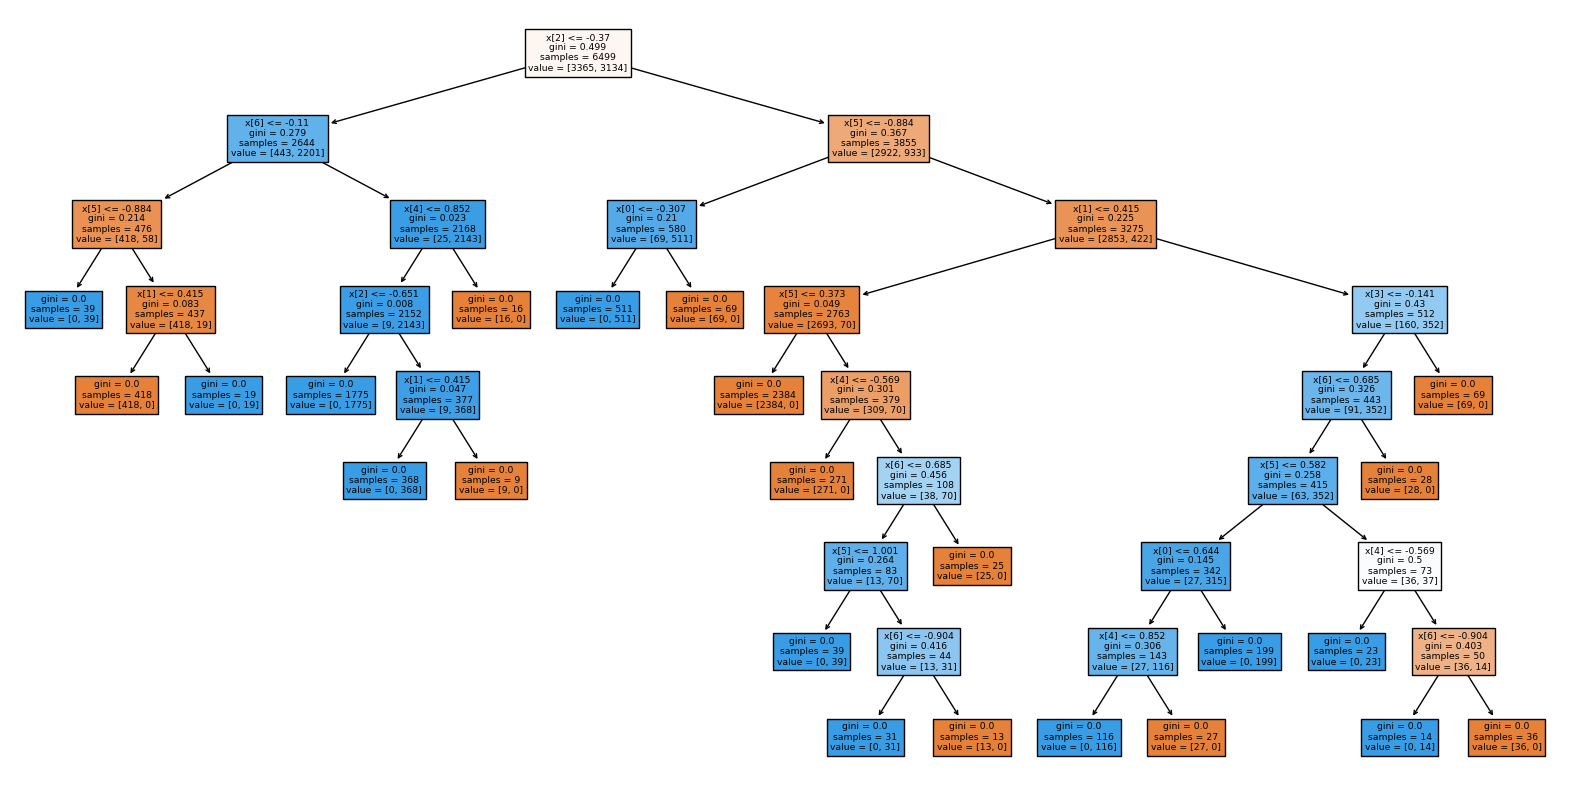

In [190]:
plt.figure(figsize=(20,10))
plot_tree(DTC2,filled=True)
plt.show()

# RandomForest Classifier

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
RCLF=RandomForestClassifier()

In [ ]:
RCLF.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
confusion_matrix(RCLF.predict(X_test),y_test)

array([[843,   0],
       [  0, 782]])

# Support Vector Classifier

In [181]:
SVClf=SVC()

In [182]:
SVClf.fit(X_train,y_train)

SVC()

In [183]:
confusion_matrix(SVClf.predict(X_test),y_test)

array([[843,   0],
       [  0, 782]])

# **Model Evaluation**


In [185]:
def Model_eval(models,X_test,Y_test):
  li=[]
  for model in models:
    tn,fp,fn,tp=confusion_matrix(Y_test,model.predict(X_test)).ravel()
    accuracy=round((tp+tn)/(tp+fn+fp+fn),2)
    precision=round(tp/(tp+fp),2)
    recall=round(tp/(tp+fn),2)
    specificity=round(tn/(fp+tn),2)
    li.append([f'{model}',tn,fp,fn,tp,accuracy,precision,recall,specificity])
  return pd.DataFrame(li,columns=['models','tn','fp','fn','tp','accuracy','precision','recall','specificity'])

x=Model_eval([logi,clf,RCLF,SVClf],X_test,y_test)
x

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,models,tn,fp,fn,tp,accuracy,precision,recall,specificity
0,LogisticRegression(),795,48,24,758,1.82,0.94,0.97,0.94
1,DecisionTreeClassifier(),843,0,0,782,2.08,1.00,1.00,1.00
2,RandomForestClassifier(),203,640,0,782,0.69,0.55,1.00,0.24
3,SVC(),843,0,0,782,2.08,1.00,1.00,1.00


In [186]:
Model_eval([DTC2],X2_test,y2_test)

,models,tn,fp,fn,tp,accuracy,precision,recall,specificity
0,DecisionTreeClassifier(),843,0,0,782,2.08,1.0,1.0,1.0


SO we can go with DTC2 model for Our Project


In [ ]:
#DTC2 is consist of class	odor	gill-size	gill-color	stalk-shape	stalk-root	spore-print-color	population feature where class is target

# Tuning

In [191]:
from sklearn.model_selection import GridSearchCV


In [194]:
Grid_params = {'criterion':['gini', 'entropy', 'log_loss'],
               'splitter':['best', 'random'],
               'max_depth':[1,2,3,4,5,6,7],
               'max_depth':[None,1,2,3,4,5]}


In [197]:
DTC_GRD=GridSearchCV(estimator = DecisionTreeClassifier(),param_grid= Grid_params,cv=5,n_jobs= -1)

In [199]:
DTC_GRD.fit(X2_train,y2_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [201]:
DTC_GRD.best_params_


{'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}

In [203]:
DTC_GRD.best_score_

1.0

In [ ]:
# no need for tuning our model perform good in Default Decision Tree Model